# Project - Artifical Recurrent Neural Network (RNN) to predict a stock closing price with Long Short Term Memory (LSTM)

This model use the past 10 years historical data to train the model and forecast the next day stock closing price based on past 60 days performance.

Database Source: Yahoo Finance


In [1]:
#This cell contains all the libraries and modules imported for the model
import math
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
import datetime
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#Read the stock quote by installing yfinance package to bypass API on google colab
yf.pdr_override()

#My chosen stock for model training
stock = "BP"

df = pdr.get_data_yahoo(stock, start="2012-01-01", end=datetime.date.today())

[*********************100%***********************]  1 of 1 completed


In [3]:
#To read top 5 and bottom 5 rows of dataset, can also use df.info(), df.columns
df.iloc[np.r_[0:3, -3:0]]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,43.790001,44.299999,43.740002,44.139999,24.404581,7315800
2012-01-04,44.470001,44.770000,44.200001,44.750000,24.741854,6883900
2012-01-05,44.250000,44.419998,44.060001,44.250000,24.465408,5570700
2021-11-19,26.370001,26.510000,26.100000,26.230000,26.230000,12258700
2021-11-22,26.250000,26.940001,26.219999,26.660000,26.660000,10026500
2021-11-23,27.059999,27.510000,27.059999,27.459999,27.459999,9914806


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2491 entries, 2012-01-03 to 2021-11-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2491 non-null   float64
 1   High       2491 non-null   float64
 2   Low        2491 non-null   float64
 3   Close      2491 non-null   float64
 4   Adj Close  2491 non-null   float64
 5   Volume     2491 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 136.2 KB


In [5]:
#inspect the stats of the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,2491.0,3.734251e+01,7.888903e+00,1.498000e+01,3.339000e+01,3.924000e+01,4.273500e+01,5.345000e+01
High,2491.0,3.759911e+01,7.871461e+00,1.530000e+01,3.368000e+01,3.945000e+01,4.295500e+01,5.348000e+01
Low,2491.0,3.706242e+01,7.914756e+00,1.474000e+01,3.317000e+01,3.884000e+01,4.243500e+01,5.320000e+01
Close,2491.0,3.733080e+01,7.900441e+00,1.490000e+01,3.342000e+01,3.911000e+01,4.269000e+01,5.338000e+01
Adj Close,2491.0,2.710296e+01,4.904487e+00,1.390151e+01,2.397273e+01,2.595416e+01,3.105600e+01,3.851641e+01
Volume,2491.0,7.810250e+06,4.921887e+06,1.724500e+06,4.680150e+06,6.422700e+06,9.370000e+06,5.470300e+07


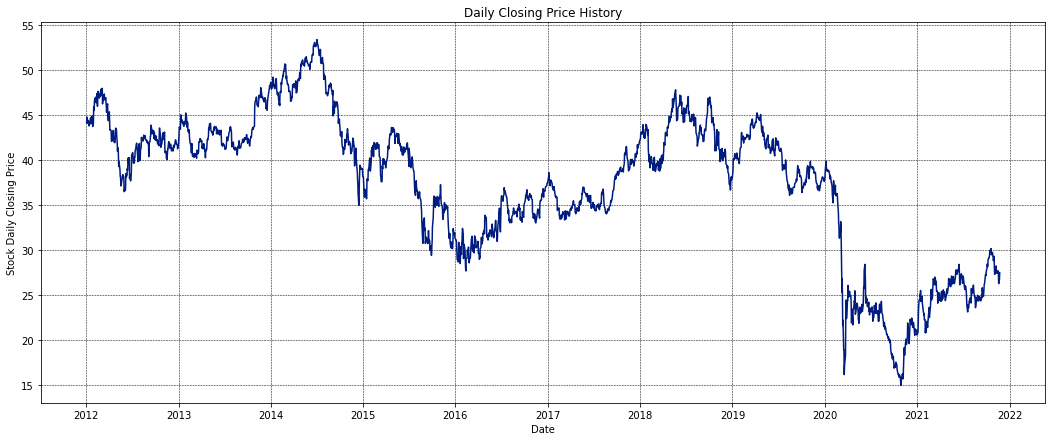

In [6]:
#Visualizing the stock closing price against date

%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(18,7))
plt.style.use("seaborn-dark-palette")
plt.title("Daily Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date")
plt.ylabel("Stock Daily Closing Price")
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

In [7]:
#Create a new dataframe with only features columns
import math

#the features selection
data=df.filter(['Open',	'High',	'Low','Close','Adj Close'])

#Convert the dataframe to numpy arrays
dataset = data.values

#Determining the data length (rows) to train-test data on
training_data_len = math.ceil(len(dataset) * 0.7)
print(training_data_len)

1744


In [8]:
#Prepare to scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [9]:
#Create the training data set with timesteps
#Create the scaled training dataset
train_data = dataset[0:training_data_len, :]
scaled_train_data = scaler.fit_transform(train_data)

#Split the data into x_train and y_train
x_train = []
y_train = []

for i in range (60, len(scaled_train_data)):
    x_train.append(scaled_train_data[i-60:i,:])
    y_train.append(scaled_train_data[i,:])

In [10]:
#Convert x_train, y_train to numpy arrays to train on LSTM model
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape)

(1684, 60, 5)


In [11]:
#Reshape the array into 3 dimesions for LSTM networks (batches,timesteps,features)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[-1]))


In [12]:
#Build the LSTM models
model = Sequential()

#Add a few layers and dropout to prevent over fitting
model.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], x_train.shape[-1])))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = x_train.shape[-1]))

In [13]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
#Fit the model
model.fit(x_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
106/106 [==============================] - 18s 102ms/step - loss: 0.0263
Epoch 2/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0103
Epoch 3/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0087
Epoch 4/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0071
Epoch 5/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0066
Epoch 6/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0059
Epoch 7/10
106/106 [==============================] - 11s 102ms/step - loss: 0.0054
Epoch 8/10
106/106 [==============================] - 11s 102ms/step - loss: 0.0053
Epoch 9/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0048
Epoch 10/10
106/106 [==============================] - 11s 101ms/step - loss: 0.0045


In [15]:
#Create the scaled testing dataset
#Create a new array containing scaled values from training_data_len - 60 days to all rows from dataset.shape[0]
test_data= dataset[training_data_len - 60: , :]
scaled_test_data=scaler.transform(test_data)

#Create the x_test and y_test data sets
x_test=[]
y_test=dataset[training_data_len:,:]

for i in range(60, len(scaled_test_data)):
    x_test.append(scaled_test_data[i-60:i, :])

In [16]:
#reshape the array
x_test = np.array(x_test)
print(x_test.shape)

#reshap needed for 3D in case of different features
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[-1]))
print(x_test.shape)

(747, 60, 5)
(747, 60, 5)


In [17]:
#Model predicitons of price values
predictions = model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

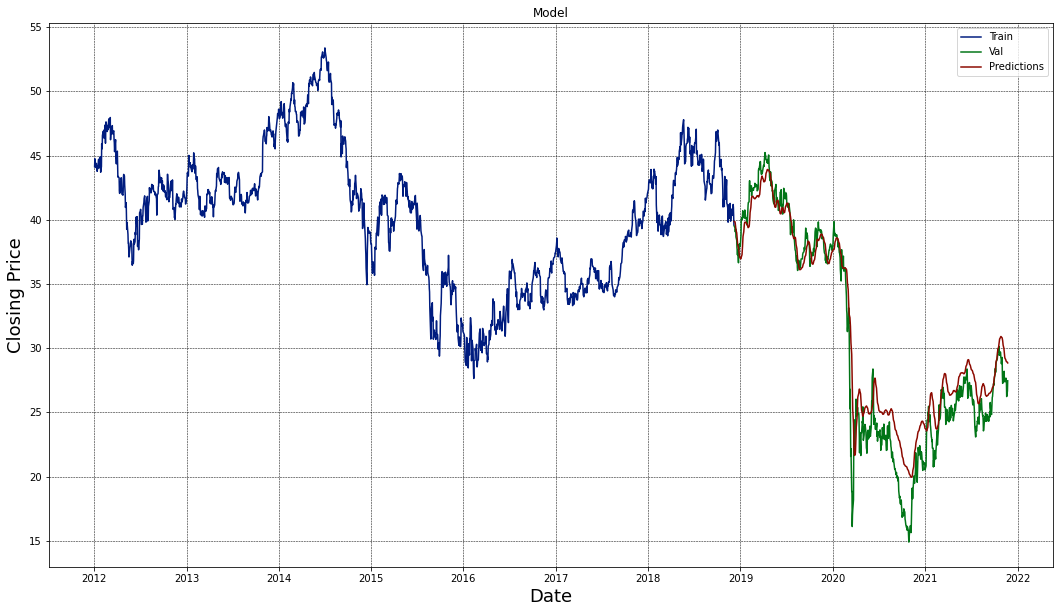

In [18]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
predictions = pd.DataFrame(data=predictions, index=valid.index, columns=valid.columns)

#Visualize the data
plt.figure(figsize=(18,10))
plt.style.use("seaborn-dark-palette")
plt.title("Model")
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing Price", fontsize = 18)
plt.plot(train["Close"])
plt.plot(valid["Close"])
plt.plot(predictions["Close"])
plt.legend(['Train','Val','Predictions'], loc='best')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.5)
plt.show()

In [19]:
#Show the valid and predicted Price
comparison=valid.filter(["Close"])
comparison["Predicted-Close"] = predictions.filter(["Close"])
print(comparison)

#RMSE
rmse = np.sqrt(np.mean(predictions-y_test)**2)
print(rmse)

                Close  Predicted-Close
Date                                  
2018-12-07  39.509998        39.867634
2018-12-10  39.369999        39.848225
2018-12-11  39.080002        39.760525
2018-12-12  39.049999        39.609833
2018-12-13  39.290001        39.415340
...               ...              ...
2021-11-17  27.430000        28.985348
2021-11-18  27.290001        28.954550
2021-11-19  26.230000        28.936478
2021-11-22  26.660000        28.906206
2021-11-23  27.459999        28.851980

[747 rows x 2 columns]
Open         0.953111
High         1.058439
Low          1.119207
Close        1.039125
Adj Close    0.548830
dtype: float64


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
0,1662.501587,1680.27063,1653.080566,1664.762329,1633.684204


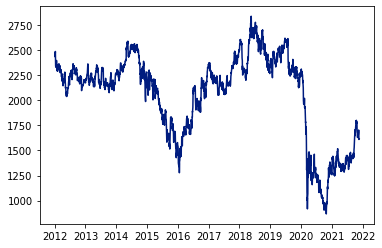

In [23]:
#Testing model with different stock (e.g. from similar sector to analyse the model accuracy)
yf.pdr_override()

#new stock quote to test
test_stock= "RDSB.L"
test_stock_data = pdr.get_data_yahoo(test_stock, start="2012-01-01", end=datetime.date.today()-timedelta(1))
#create new dataframe
stock_df = test_stock_data.filter(['Open','High',	'Low','Close','Adj Close'])
#Quick Visualization
plt.plot(stock_df["Close"])
#get the last 60 days closing price and convert to np.arrays
last_60_days = stock_df[-60:].values
#scale the data
last_60_days_scaled=scaler.fit_transform(last_60_days)
#creat empty list for test data
X_test=[]
#append last 60 days into test data list
X_test.append(last_60_days_scaled)
#transfrom to nparray
X_test =np.array(X_test)
#convert the X_test into 3D
X_test= np.reshape(X_test, (X_test.shape[0], X_test.shape[1],X_test.shape[-1]))

pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
pred_price = pd.DataFrame(data=pred_price, columns=stock_df.columns)
pred_price

In [24]:
#Comparing the price
today_quote = pdr.get_data_yahoo(test_stock, datetime.date.today())
today_quote.drop(columns=["Volume"])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close
Date,,,,,
2021-11-23,1607.199951,1650.599976,1597.599976,1638.800049,1638.800049
